# Criandp agrupamento de dados
[Documentação](https://pandas.pydata.org/docs/reference/frame.html?highlight=descriptive%20stats#computations-descriptive-stats) do pandas com metodos para analise descritiva

In [1]:
import pandas as pd

In [7]:
dados = pd.read_csv("./output/dados_residenciais_tratados_novaColuna.csv",sep=";")

In [6]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


In [19]:
agrupamento_bairros = dados.groupby("Bairro")# cria algo como uma lista de DF, nesse caso, cada DF seria de um bairro
media_valores_bairros = agrupamento_bairros[["Valor","Condominio","IPTU","Valor m2"]].mean().round(2)

In [23]:
media_valores_bairros.sort_values("Condominio")

,Valor,Condominio,IPTU,Valor m2
Bairro,,,,
Lins de Vasconcelos,1086.17,11502.60,69.19,15.34
Jardim Carioca,2211.11,4108.11,442.89,22.39
Barra da Tijuca,7069.55,3591.01,1510.81,35.73
Arpoador,12923.92,3493.92,500.25,59.83
São Conrado,8780.89,2936.06,1305.48,36.05
...,...,...,...,...
Paquetá,10550.00,0.00,3.50,21.24
Vila Militar,500.00,0.00,0.00,16.67
Colégio,885.00,0.00,0.00,16.86


## Estatisticas descritivas

In [27]:
agrupamento_bairros["Valor"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Abolição,15.0,1195.33,425.32,800.0,900.0,1180.0,1200.0,2300.0
Alto da Boa Vista,6.0,3966.67,5513.59,600.0,1150.0,1725.0,3275.0,15000.0
Anchieta,4.0,875.00,132.29,700.0,812.5,900.0,962.5,1000.0
Andaraí,97.0,1464.71,408.11,700.0,1200.0,1400.0,1650.0,2950.0
Anil,71.0,2048.87,1523.97,300.0,1100.0,1500.0,2675.0,7000.0
...,...,...,...,...,...,...,...,...
Vila Valqueire,48.0,1769.58,2203.01,800.0,1000.0,1250.0,1700.0,16000.0
Vila da Penha,104.0,1260.58,644.66,450.0,900.0,1100.0,1302.5,4500.0
Vista Alegre,16.0,1114.38,199.60,700.0,1012.5,1200.0,1225.0,1400.0


In [30]:
agrupamento_bairros["Valor"].aggregate(["max","min"]).rename(columns={"min":"Minimo", "max":"Maximo"})

,Maximo,Minimo
Bairro,,
Abolição,2300.0,800.0
Alto da Boa Vista,15000.0,600.0
Anchieta,1000.0,700.0
Andaraí,2950.0,700.0
Anil,7000.0,300.0
...,...,...
Vila Valqueire,16000.0,800.0
Vila da Penha,4500.0,450.0
Vista Alegre,1400.0,700.0


## Usando o matplot lib para visualizar melhor os dados

In [32]:
# Para visualizar os graficos no jupyter e necessario fazer a seguinte configuracao 
%matplotlib inline
import matplotlib as plt

In [33]:
# Configuracao de tamanho
plt.rc("figure",figsize=(20,10))

Com a visualização pelo grafico de barras conseguimos ter uma visão geral do data frame. 

<AxesSubplot: xlabel='Bairro'>

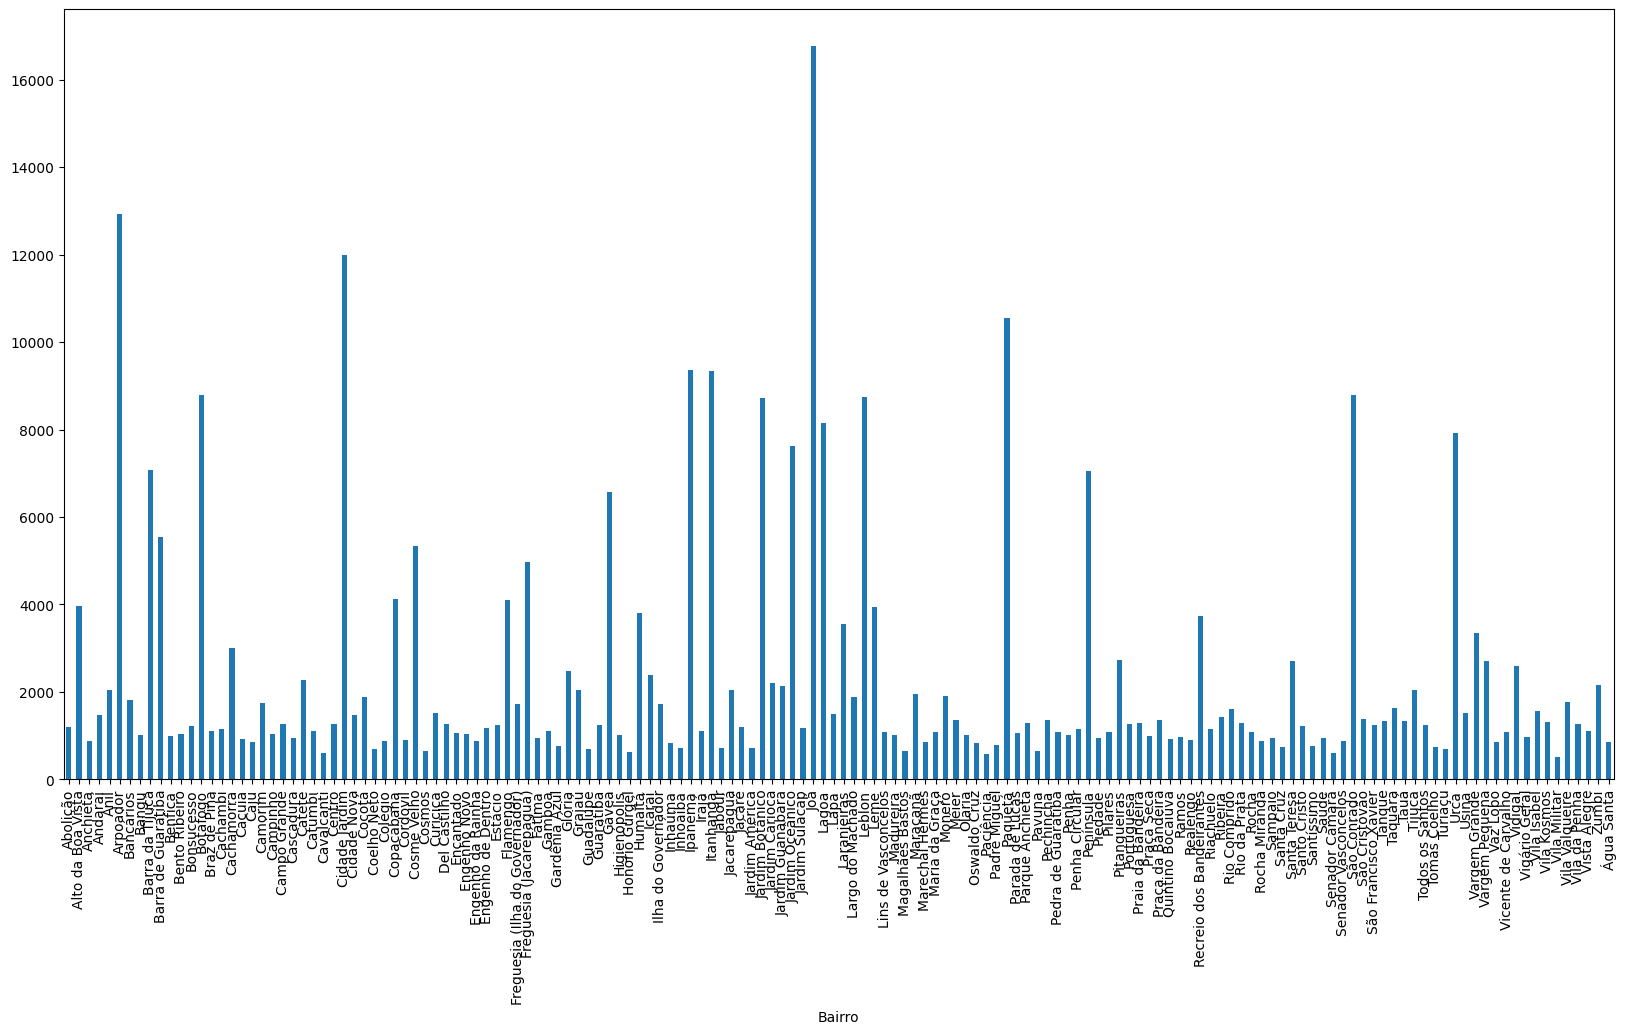

In [34]:
agrupamento_bairros["Valor"].mean().plot.bar()

No grafico abaixo que mostra o desvio padrão é possível identificar alguns problemas com a base. Alguns bairros estão com o desvio padrão muito alto, o que pode indicar erro na base

<AxesSubplot: xlabel='Bairro'>

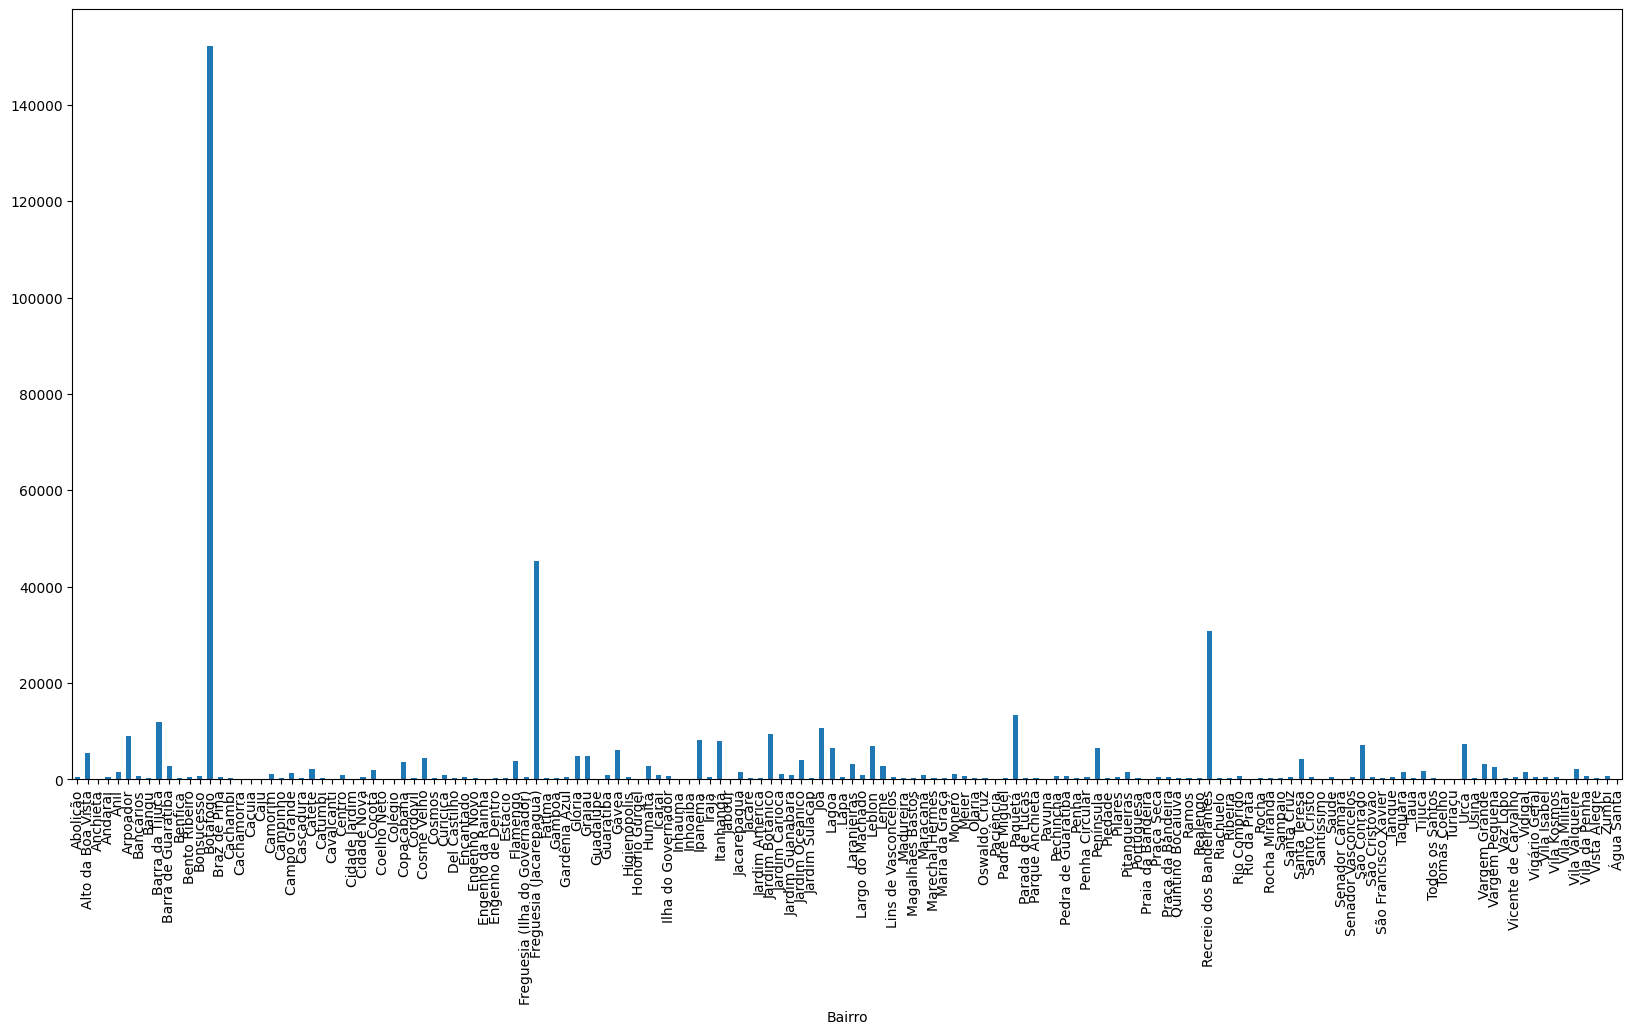

In [36]:
agrupamento_bairros["Valor"].std().plot.bar()

<AxesSubplot: xlabel='Bairro'>

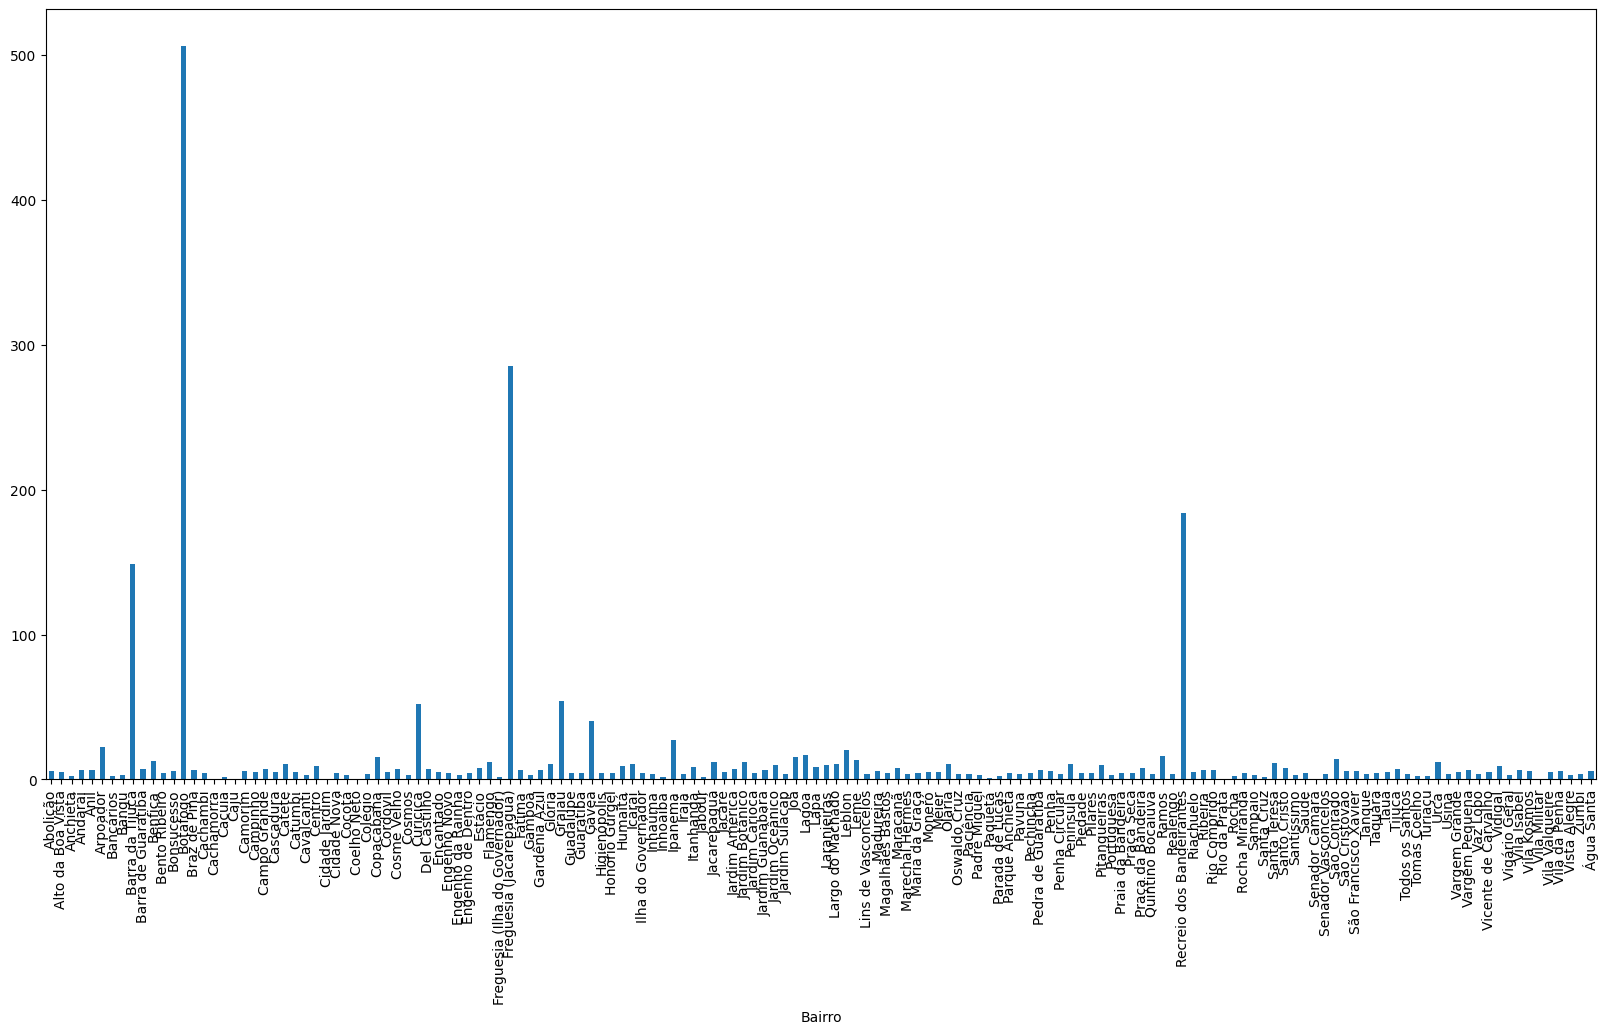

In [37]:
agrupamento_bairros["Valor m2"].std().plot.bar()